# Project Description ⛳
<hr>

**Your final project will involve all topics covered from Week 2 to 8 by using data to solve a real-life problem. Remember you're doing this with your team**.

You’ve learned a ton about data collection and cleaning, visualization and insight, machine leearning, and model evaluation in this course. The final project is your chance to solve a problem with these from scratch.


`Use the rubric below as a guideline for your project as this will be used in grading your submissions`.

In [1]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



# Load the datasets provided

- We have been provided with two datasets in the form of csv files. 
- 1. IDsmapping.csv which contains the mapping of different ids. 
- 2. Diabetic_data.csv that contains the information related to diabetes of different patients. 


In [2]:
# Load the datasets
ids_mapping = pd.read_csv('IDs_mapping.csv')
diabetic_data = pd.read_csv('diabetic_data.csv')

# Display the first few rows of each dataset
print("IDs Mapping:")
ids_mapping.head()



IDs Mapping:


,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [3]:
print("\nDiabetic Data:")
diabetic_data.head()


Diabetic Data:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Print missing values before handling
print("Missing values before handling:")
print(diabetic_data.isnull().sum())

Missing values before handling:
encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride     

# Data cleaning & preprocessing

- Demonstrate clear understanding of different data cleaning and preprocessing techniques by applying them to your dataset.
- Clearly document (within the notebook) all cleaning and preprocessing steps.

In [5]:
# 1 (a). Data cleaning by handling missing values in all columns:

# Define columns with missing values 
columns_with_missing = diabetic_data.columns[diabetic_data.isnull().any()].tolist()

# Create a SimpleImputer object with strategy based on column type
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation to numerical and categorical columns separately
numerical_columns = diabetic_data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = diabetic_data.select_dtypes(include=['object']).columns

diabetic_data[numerical_columns] = numerical_imputer.fit_transform(diabetic_data[numerical_columns])
diabetic_data[categorical_columns] = categorical_imputer.fit_transform(diabetic_data[categorical_columns])

# Display information about missing values after handling
print("\nMissing values after handling:")
diabetic_data.isnull().sum()



Missing values after handling:


encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [6]:
# 1 (b) Data cleaning by handling ? in all columns with ? values:
# Identify columns with '?' values
columns_with_question_mark = diabetic_data.columns[diabetic_data.isin(['?']).any()].tolist()

print("Columns with '?' values:", columns_with_question_mark)

# Count the number of '?' in each column
question_mark_counts = diabetic_data[columns_with_question_mark].apply(lambda x: x.value_counts()['?'])

# Calculate the percentage of '?' in each column
question_mark_percentage = (question_mark_counts / len(diabetic_data)) * 100

# Create a DataFrame to store the results and reset the index
question_mark_results = pd.DataFrame({'Column': columns_with_question_mark, 'Count': question_mark_counts, 'Percentage': question_mark_percentage}).reset_index(drop=True)

# Display the results
print("\nCount and Percentage of '?' in each column:")
print(question_mark_results)


Columns with '?' values: ['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']

Count and Percentage of '?' in each column:
              Column  Count  Percentage
0               race   2273    2.233555
1             weight  98569   96.858479
2         payer_code  40256   39.557416
3  medical_specialty  49949   49.082208
4             diag_1     21    0.020636
5             diag_2    358    0.351787
6             diag_3   1423    1.398306


In [7]:
# 1 (c) Data cleaning by dropping ? in all columns with ? values:
# Define a threshold for dropping columns
threshold = 30  # Drop columns with more than 30% '?' values

# Identify columns to drop
columns_to_drop = question_mark_results['Column'][question_mark_results['Percentage'] > threshold]

# Drop columns
clean_diabetic_data = diabetic_data.drop(columns=columns_to_drop)

# Fill remaining '?' values with the most frequent value in each column
clean_diabetic_data = clean_diabetic_data.replace('?', np.nan)
clean_diabetic_data = clean_diabetic_data.apply(lambda x: x.fillna(x.value_counts().idxmax()))

# Display information about the DataFrame after filling remaining '?' values
print("\nDataFrame after filling remaining '?' values:")
clean_diabetic_data.head(30)




DataFrame after filling remaining '?' values:


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392.0,8222157.0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190.0,55629189.0,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410.0,86047875.0,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364.0,82442376.0,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680.0,42519267.0,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754.0,82637451.0,Caucasian,Male,[50-60),2.0,1.0,2.0,3.0,31.0,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842.0,84259809.0,Caucasian,Male,[60-70),3.0,1.0,2.0,4.0,70.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768.0,114882984.0,Caucasian,Male,[70-80),1.0,1.0,7.0,5.0,73.0,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522.0,48330783.0,Caucasian,Female,[80-90),2.0,1.0,4.0,13.0,68.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738.0,63555939.0,Caucasian,Female,[90-100),3.0,3.0,4.0,12.0,33.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
# 2. Data cleaning by handling duplicates in the dataset. 
# Check for duplicate records
num_duplicates_before = clean_diabetic_data.duplicated().sum()
print(f"Number of duplicate records before dropping: {num_duplicates_before}")

# Drop duplicate records
clean_diabetic_data.drop_duplicates(inplace=True)

# Check for duplicate records after dropping
num_duplicates_after = clean_diabetic_data.duplicated().sum()
print(f"Number of duplicate records after dropping: {num_duplicates_after}")

Number of duplicate records before dropping: 0
Number of duplicate records after dropping: 0


In [9]:
# 3. Data cleaning by handling outliers in the dataset using the Interquartile Range (IQR) method

# Function to handle outliers using IQR method
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Replace values outside the acceptable range with the nearest acceptable value
    df[column] = df[column].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

# Apply outlier handling to numerical columns
for col in numerical_columns:
    handle_outliers_iqr(diabetic_data, col)

# Display the data after handling outliers
print("\nData after handling outliers with IQR:")
clean_diabetic_data.head()


Data after handling outliers with IQR:


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392.0,8222157.0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190.0,55629189.0,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410.0,86047875.0,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364.0,82442376.0,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680.0,42519267.0,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [10]:
# 3. Data cleaning by handling outliers in the dataset using the  winsorization method
# Define the quantiles for winsorization
lower_quantile = 0.05
upper_quantile = 0.95

# Identify numerical columns
numerical_columns = clean_diabetic_data.select_dtypes(include=['int64', 'float64']).columns

# Apply winsorization to all numerical columns
for col in numerical_columns:
    lower_threshold = clean_diabetic_data[col].quantile(lower_quantile)
    upper_threshold = clean_diabetic_data[col].quantile(upper_quantile)
    
    # Winsorize the data
    clean_diabetic_data[col] = clean_diabetic_data[col].clip(lower=lower_threshold, upper=upper_threshold)

# Print the updated dataset
print("\nData after handling outliers with winsorization:")
clean_diabetic_data.head()



Data after handling outliers with winsorization:


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,27170784.0,8222157.0,Caucasian,Female,[0-10),6.0,18.0,1.0,1.0,41.0,...,No,No,No,No,No,No,No,No,No,NO
1,27170784.0,55629189.0,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,27170784.0,86047875.0,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,27170784.0,82442376.0,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,27170784.0,42519267.0,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Exploratory Data Analysis
- Apply both measure of central tendency and dispersion to understand the data.
- Perform corellation analysis of the dependent and independent variables
- What does the corellation analysis says about the dependent and independent variables

In [11]:
#EDA task 1. Measure of Central Tendency 

# Select relevant numerical features
numerical_features = clean_diabetic_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate Mean, Median, and Mode
mean_values = clean_diabetic_data[numerical_features].mean()
median_values = clean_diabetic_data[numerical_features].median()
mode_values = clean_diabetic_data[numerical_features].mode().iloc[0]  # Use iloc[0] to get the first mode if multiple

# Create a DataFrame to display the results
central_tendency = pd.DataFrame({'Mean': mean_values, 'Median': median_values, 'Mode': mode_values})
print("\nMeasures of Central Tendency:")
print(central_tendency)



Measures of Central Tendency:
                                  Mean       Median         Mode
encounter_id              1.641807e+08  152388987.0  27170784.00
patient_nbr               5.311885e+07   45505143.0   1456971.75
admission_type_id         2.017511e+00          1.0         1.00
discharge_disposition_id  3.531985e+00          1.0         1.00
admission_source_id       5.748944e+00          7.0         7.00
time_in_hospital          4.327261e+00          4.0         3.00
num_lab_procedures        4.285068e+01         44.0        73.00
num_procedures            1.291050e+00          1.0         0.00
num_medications           1.576892e+01         15.0         6.00
number_outpatient         2.449836e-01          0.0         0.00
number_emergency          1.118546e-01          0.0         0.00
number_inpatient          5.483167e-01          0.0         0.00
number_diagnoses          7.471719e+00          8.0         9.00


In [12]:
#EDA Task 2 - Measure of dispersion

# Calculate Range, Variance, and Standard Deviation
range_values = clean_diabetic_data[numerical_features].max() - diabetic_data[numerical_features].min()
variance_values = clean_diabetic_data[numerical_features].var()
std_deviation_values = clean_diabetic_data[numerical_features].std()

# Create a DataFrame to display the results
dispersion = pd.DataFrame({'Range': range_values, 'Variance': variance_values, 'Std Deviation': std_deviation_values})
print("\nMeasures of Dispersion:")
print(dispersion)



Measures of Dispersion:
                                Range      Variance  Std Deviation
encounter_id              378950321.0  9.614896e+15   9.805558e+07
patient_nbr               111480138.0  1.287103e+15   3.587621e+07
admission_type_id                 5.0  2.024712e+00   1.422924e+00
discharge_disposition_id         17.0  2.155106e+01   4.642312e+00
admission_source_id              16.0  1.637473e+01   4.046571e+00
time_in_hospital                 10.0  7.844455e+00   2.800795e+00
num_lab_procedures               72.0  3.502529e+02   1.871505e+01
num_procedures                    5.0  2.502357e+00   1.581884e+00
num_medications                  30.0  4.740614e+01   6.885212e+00
number_outpatient                 2.0  3.459668e-01   5.881894e-01
number_emergency                  1.0  9.934416e-02   3.151891e-01
number_inpatient                  3.0  8.119680e-01   9.010927e-01
number_diagnoses                  7.5  3.228872e+00   1.796906e+00


In [13]:
#EDA Task 3 a - Correlation Analysis of the whole dataset

# Exclude non-numeric columns from correlation analysis
numeric_data = clean_diabetic_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Display correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                          encounter_id  patient_nbr  admission_type_id  \
encounter_id                  1.000000     0.489209          -0.161249   
patient_nbr                   0.489209     1.000000          -0.005293   
admission_type_id            -0.161249    -0.005293           1.000000   
discharge_disposition_id     -0.140567    -0.149249           0.058985   
admission_source_id          -0.115732    -0.031814           0.111147   
time_in_hospital             -0.063097    -0.019969          -0.011626   
num_lab_procedures           -0.023569     0.020376          -0.155730   
num_procedures               -0.020661    -0.021894           0.133825   
num_medications               0.089883     0.034301           0.077142   
number_outpatient             0.134030     0.153183           0.047662   
number_emergency              0.119635     0.114389          -0.023605   
number_inpatient              0.031084     0.029656          -0.040543   
number_diagnoses 

In [14]:
# EDA Task 3 (b1) - Correlation Analysis of the key variables

# Selecting key variables
selected_variables = [
    'time_in_hospital',
    'num_medications',
    'num_lab_procedures',
    'number_diagnoses',
    'admission_type_id',
    'discharge_disposition_id',
    'admission_source_id',
    'change',
    'readmitted'
]

# Create a subset of the dataframe with selected variables
selected_data = clean_diabetic_data[selected_variables].copy()  # Explicitly create a copy

# Convert 'No' to 0 and 'Yes' to 1 in the 'change' and 'readmitted' columns
selected_data['change'] = selected_data['change'].map({'No': 0, 'Ch': 1})
selected_data['readmitted'] = selected_data['readmitted'].map({'NO': 0, '>30': 1, '<30': 1})

# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                          time_in_hospital  num_medications  \
time_in_hospital                  1.000000         0.472379   
num_medications                   0.472379         1.000000   
num_lab_procedures                0.316625         0.257072   
number_diagnoses                  0.223167         0.273659   
admission_type_id                -0.011626         0.077142   
discharge_disposition_id          0.176231         0.107639   
admission_source_id              -0.005634        -0.048545   
change                            0.111072         0.249117   
readmitted                        0.053492         0.059127   

                          num_lab_procedures  number_diagnoses  \
time_in_hospital                    0.316625          0.223167   
num_medications                     0.257072          0.273659   
num_lab_procedures                  1.000000          0.150825   
number_diagnoses                    0.150825          1.000000   
admission_type_id 

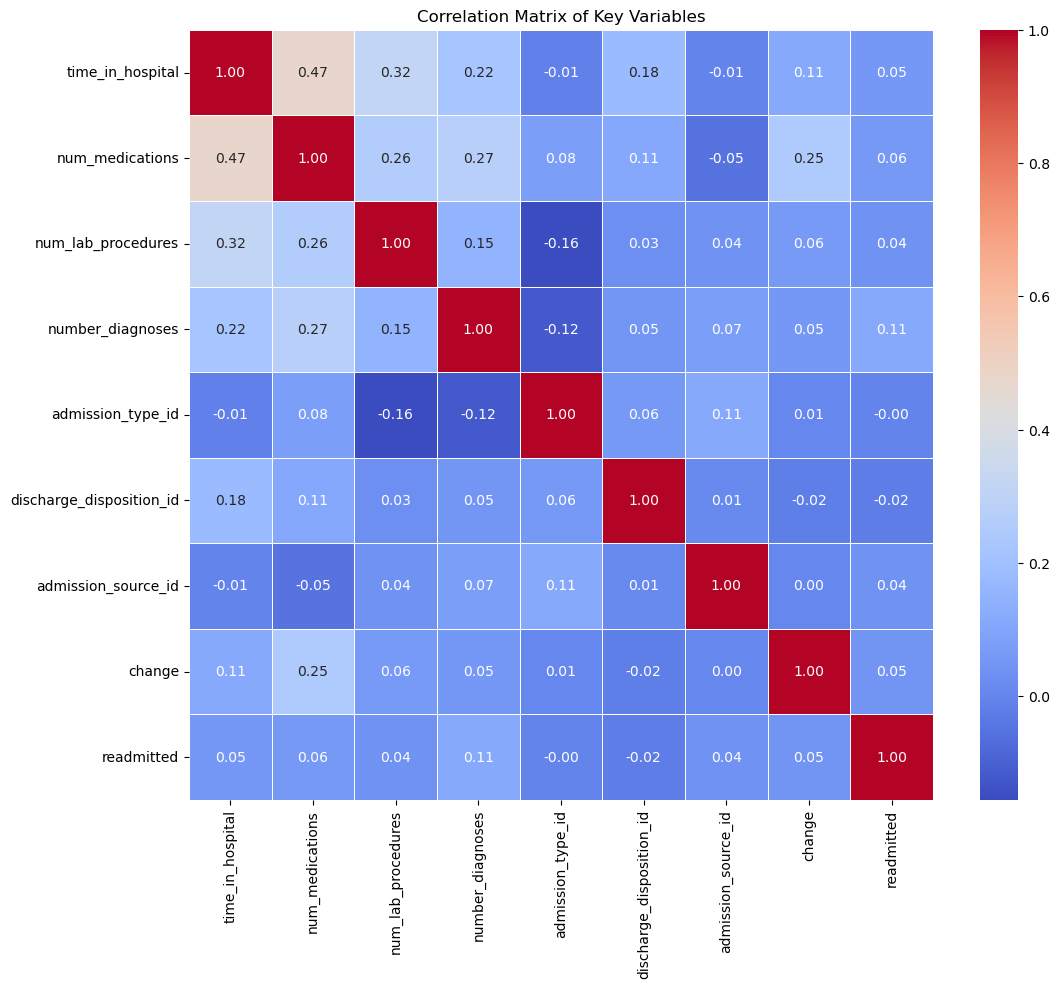

In [15]:
#EDA Task 3 (b2) - Correlation Analysis visualization of the key variables 

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Key Variables')
plt.show()

# Data Visualization & Insight
- Use at least 5 different visuals to tell a story about the data
- Clearly document (within the notebook) 5 different insights you gained from the data

## Visual 1 - Age Distribution of Patients:
 Description:
- This visualization provides insights into the age groups of diabetic patients in the dataset.

Interpretation:
- Each bar in the chart represents an age group, and the height of the bar indicates the count of patients in that age group.
- The age groups are defined using bins, making it easier to analyze the distribution.

Relevance:
- Understanding Demographics: By examining the age distribution, we can identify the prevalent age groups among diabetic patients.
- Targeted Healthcare Planning: This information can assist in tailoring healthcare strategies based on the dominant age groups observed.

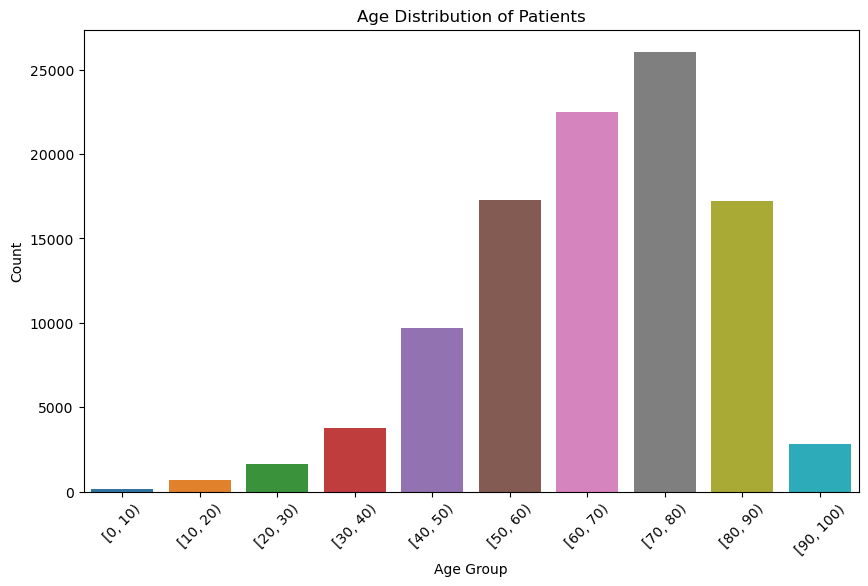

In [16]:
# Extract numerical values from the 'age' column
clean_diabetic_data['age_numeric'] = clean_diabetic_data['age'].apply(lambda x: int(x.split('-')[0][1:]))

# Define age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create a new column 'age_group' with the specified bins
clean_diabetic_data['age_group'] = pd.cut(clean_diabetic_data['age_numeric'], bins=age_bins, right=False)

# Plotting the Age Distribution with bins
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=clean_diabetic_data, order=clean_diabetic_data['age_group'].unique())
plt.title('Age Distribution of Patients')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


## Visual 2. Gender Distribution:

Description:
- This visualization illustrates the gender distribution among diabetic patients in the dataset.

Interpretation:
- The bar chart displays the count of patients for each gender category.
-It helps in assessing the balance between male and female patients.

Relevance:
*  Gender-specific Health Insights: Understanding the distribution helps in gaining insights into gender-specific health patterns.
* Support for Targeted Interventions: Healthcare interventions can be tailored based on the observed gender distribution.

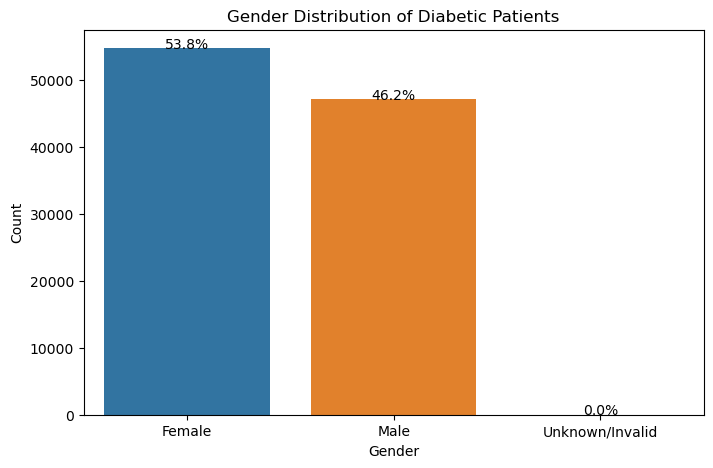

In [17]:
# Plotting the Gender Distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='gender', data=clean_diabetic_data)

# Set the title and labels
plt.title('Gender Distribution of Diabetic Patients')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add percentage annotations on top of each bar
total = len(clean_diabetic_data['gender'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2,
            f'{height/total:.1%}', ha="center")

plt.show()

## Visual 3. Number of Diagnoses visualization
Description:
- This visualization displays the distribution of the number of diagnoses for diabetic patients.

Interpretation:
- The count plot shows the frequency of different numbers of diagnoses among diabetic patients.
- It helps identify common scenarios regarding the number of diagnoses.

Relevance:
- Diagnostic Patterns: Understanding the distribution aids in identifying common patterns of diagnoses.
- Healthcare Planning: Healthcare resources and planning can be optimized based on prevalent diagnosis scenarios.

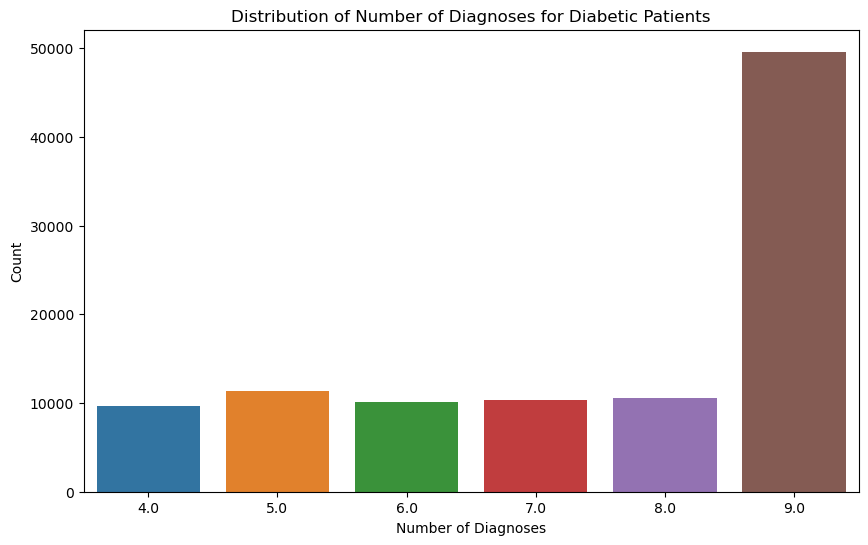

In [18]:
# Plotting the Number of Diagnoses Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='number_diagnoses', data=clean_diabetic_data)
plt.title('Distribution of Number of Diagnoses for Diabetic Patients')
plt.xlabel('Number of Diagnoses')
plt.ylabel('Count')
plt.show()


## visual 4 - Medication Prescription Patterns for Diabetic Patients

Description:
- This visualization is a stacked bar chart that shows the distribution of medication prescriptions for different types of diabetes medications among diabetic patients.

Interpretation:
- Each bar in the chart represents a specific medication, and the height of the bar represents the count of prescriptions for that medication.
- The bars are stacked to show the breakdown of prescription status (e.g., 'No', 'Steady', 'Up', 'Down').
- Different colors within each bar represent different prescription statuses.

Relevance:
- Identifying Commonly Prescribed Medications: By looking at the chart, you can identify which medications are frequently prescribed to diabetic patients.
- Understanding Prescription Trends: The breakdown of prescription status helps understand whether patients are mostly on a steady dose, have had a change in dosage (up or down), or if the medication is not prescribed ('No').

<Figure size 1400x800 with 0 Axes>

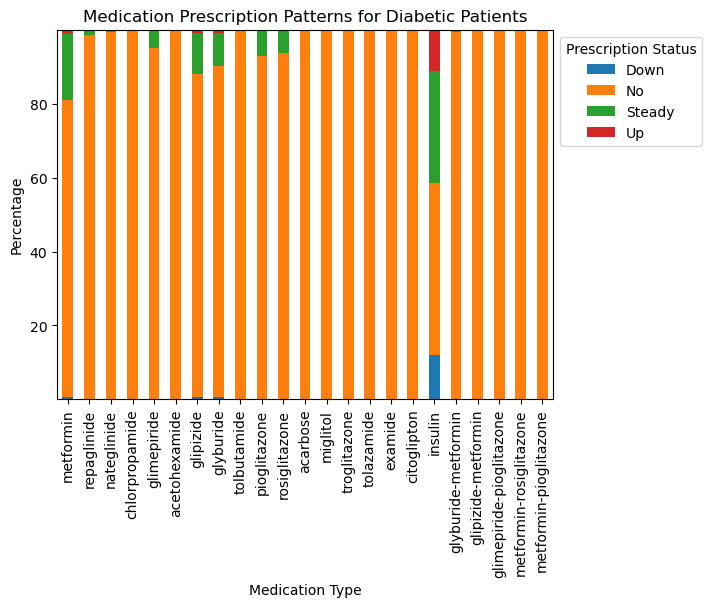

In [19]:
# Selecting relevant medication columns
medication_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
                      'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                      'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
                      'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                      'metformin-pioglitazone']

# Plotting Medication Prescription Patterns as percentages
plt.figure(figsize=(14, 8))
medication_data = clean_diabetic_data[medication_columns].apply(lambda x: x.value_counts(normalize=True) * 100)
medication_data.transpose().plot(kind='bar', stacked=True)
plt.title('Medication Prescription Patterns for Diabetic Patients')
plt.xlabel('Medication Type')
plt.ylabel('Percentage')
plt.legend(title='Prescription Status', bbox_to_anchor=(1, 1))
plt.show()






## visual 5 (a)- Race distribution of diabetic patients 

Description:
- This visualization is a count plot that illustrates the distribution of diabetic patients across different racial categories.

Interpretation:
- Each bar represents a racial category, and the height of the bar indicates the count of diabetic patients in that category.
- The plot uses a color palette ('viridis') to distinguish between different racial categories.

Relevance:
- Understanding Racial Distribution: The plot provides insights into the racial distribution of diabetic patients in the dataset.
- Recognizing Dominant and Underrepresented Groups: By observing the heights of the bars, it's possible to identify which racial categories have a higher or lower representation among diabetic patients.

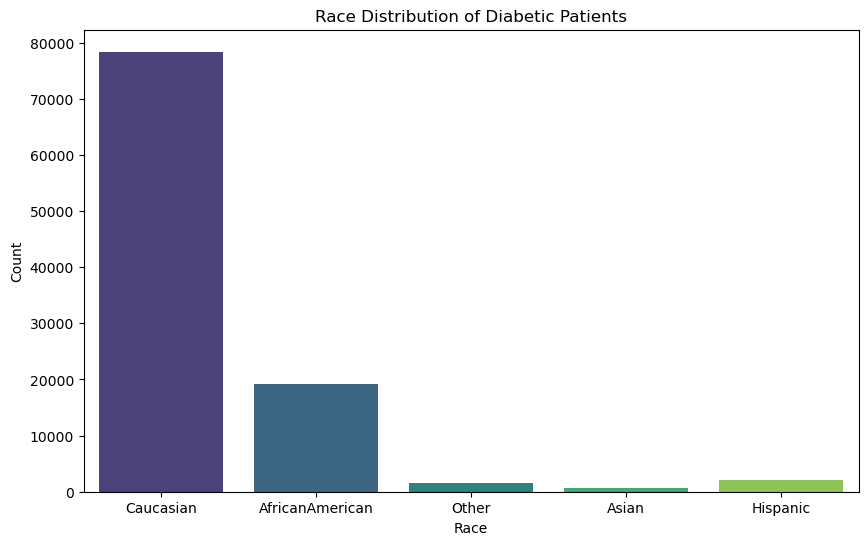

In [20]:
# Create a count plot for race distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='race', data=clean_diabetic_data, palette='viridis')

# Set the title and labels
plt.title('Race Distribution of Diabetic Patients')
plt.xlabel('Race')
plt.ylabel('Count')

# Show the plot
plt.show()

## Visual 5 (b)- Race Distribution of Diabetic Patients (Styled Pie Chart with Legend)

Description:
- This visualization is a styled pie chart that depicts the percentage distribution of diabetic patients across different racial categories.
- A legend is added to the side to show the percentages for each category.

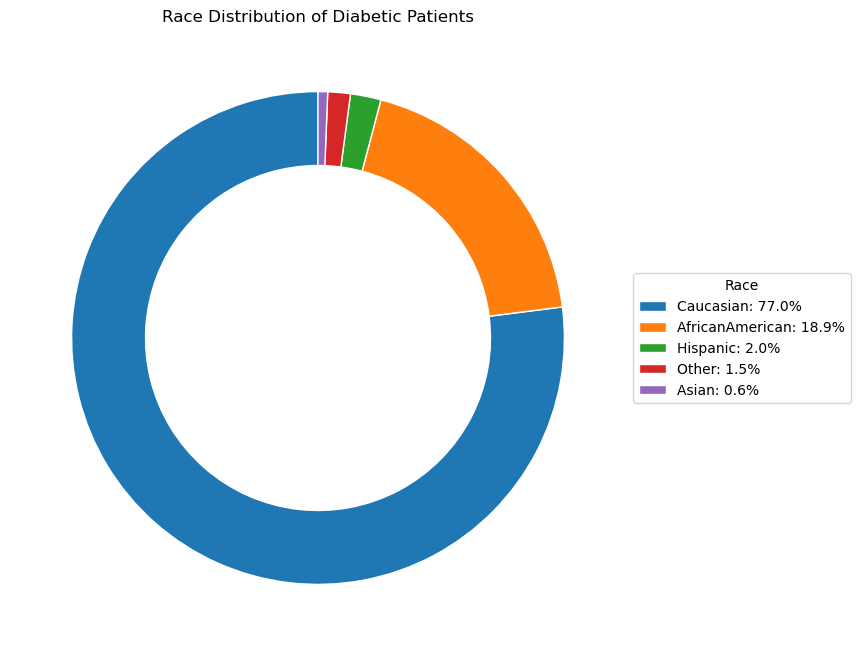

In [21]:
# Calculate percentage distribution
race_percentage = clean_diabetic_data['race'].value_counts(normalize=True) * 100

# Define colors for each category
colors = plt.cm.tab10.colors[:len(race_percentage)]

# Create a pie chart with styling
plt.figure(figsize=(10, 8))
wedges, texts, _ = plt.pie(race_percentage, labels=None, autopct='', startangle=90, colors=colors, wedgeprops=dict(width=0.3, edgecolor='w'))

# Create a legend to the side
plt.legend(wedges, race_percentage.index, title="Race", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Add percentages as text to the legend
legend_labels = [f"{label}: {race_percentage[label]:.1f}%" for label in race_percentage.index]
plt.legend(legend_labels, title="Race", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set the title
plt.title('Race Distribution of Diabetic Patients')

# Show the plot
plt.show()


## Visual 6 - Relationship between Time in Hospital, Number of Procedures, and Readmission

Description:
- This visualization is a pair plot that explores the relationship between the time spent in the hospital, the number of procedures performed, and the likelihood of readmission among diabetic patients.

Interpretation:
- The pair plot displays scatter plots for each combination of variables: time in the hospital, number of procedures, and readmission status.
- The hue ('readmitted') is used to color the points based on different readmission categories ('NO', '>30', '<30').
- Points are scattered along the plots, and patterns or trends can be observed based on the colors.

Relevance:
- Identifying Relationships: By examining the scatter plots, we can identify potential relationships or patterns between time in the hospital, number of procedures, and readmission.
- Readmission Patterns: The color-coded points help visualize how different readmission categories are distributed across the variables, offering insights into factors associated with readmission.
- Supporting Predictive Analysis: Understanding these relationships is crucial for building models to predict readmission, as certain patterns may indicate increased risk or protective factors.

c:\Users\giddy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


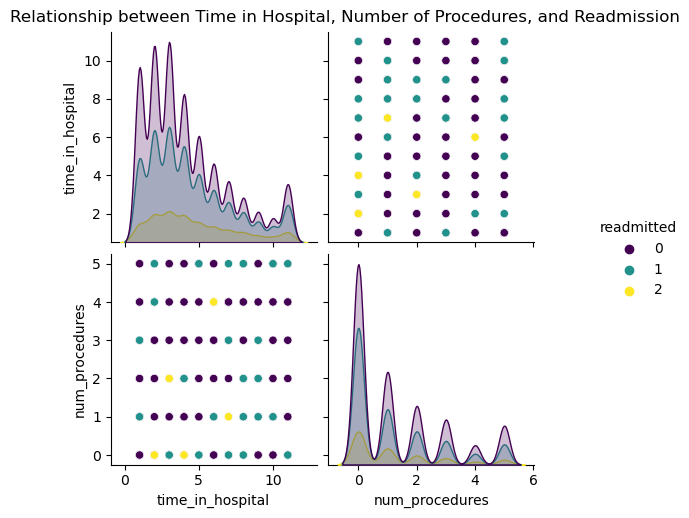

In [22]:
#  Select relevant columns
readmission_data = clean_diabetic_data[['time_in_hospital', 'num_procedures', 'readmitted']].copy()

# Map 'readmitted' values to numerical for better visualization
readmission_data['readmitted'] = readmission_data['readmitted'].map({'NO': 0, '>30': 1, '<30': 2})

# Create a pair plot
sns.pairplot(readmission_data, hue='readmitted', palette='viridis')
plt.suptitle('Relationship between Time in Hospital, Number of Procedures, and Readmission', y=1.02)
plt.show()

# Feature Engineering
- Convert categorical or non-numeric features into a numerical representation
- Transform neccessary features using feature transformation techniques of your choice.

In [23]:
# Applying Label Encoding to the 'age_group' column
le = LabelEncoder()
clean_diabetic_data['age_group'] = le.fit_transform(
    clean_diabetic_data['age_group'])

# Applying One-Hot Encoding to other categorical columns
categorical_cols = clean_diabetic_data.select_dtypes(
    include=['object']).columns
clean_diabetic_data = pd.get_dummies(
    clean_diabetic_data, columns=categorical_cols)

# Identifying continuous columns for standardization
unique_threshold = 10
continuous_cols = [col for col in clean_diabetic_data.columns
                   if clean_diabetic_data[col].nunique() > unique_threshold]

# Standardizing continuous columns
scaler = StandardScaler()
clean_diabetic_data[continuous_cols] = scaler.fit_transform(
    clean_diabetic_data[continuous_cols])

# Dropping 'encounter_id' and 'patient_nbr' columns
clean_diabetic_data.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

clean_diabetic_data.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
0,6.0,3.116569,-1.173578,-1.187976,-0.098888,0.0,-1.418833,0.0,0.0,0.0,...,False,True,False,False,True,True,False,False,False,True
1,1.0,-0.545417,0.309166,-0.473889,0.862910,0.0,0.324041,0.0,0.0,0.0,...,False,True,False,True,False,False,True,False,True,False
2,1.0,-0.545417,0.309166,-0.830933,-1.701884,5.0,-0.402157,2.0,0.0,1.0,...,False,True,False,False,True,False,True,False,False,True
3,1.0,-0.545417,0.309166,-0.830933,0.061412,1.0,0.033562,0.0,0.0,0.0,...,False,True,False,True,False,False,True,False,False,True
4,1.0,-0.545417,0.309166,-1.187976,0.435444,0.0,-1.128354,0.0,0.0,0.0,...,False,True,False,True,False,False,True,False,False,True


# Machine Learning
- Use 2 different ML algorithms to build a model using your preprocessed data.
- Compare the 2 models based on their accuracy.

In [24]:
# Creating a binary target variable: 1 if readmitted (<30 or >30), 0 if not readmitted (NO)
clean_diabetic_data['readmitted_binary'] = (
    clean_diabetic_data['readmitted_<30'] | clean_diabetic_data['readmitted_>30']).astype(int)

# Dropping original readmission columns
clean_diabetic_data.drop(['readmitted_<30', 'readmitted_>30',
                   'readmitted_NO'], axis=1, inplace=True)

# Calculating the correlation of each feature with the target variable 'readmitted_binary'
correlations = clean_diabetic_data.corrwith(
    clean_diabetic_data['readmitted_binary']).sort_values(ascending=False)

# Displaying the top correlated features
correlations.head(10)

readmitted_binary    1.000000
number_inpatient     0.231765
number_emergency     0.124014
number_diagnoses     0.112883
number_outpatient    0.106572
diag_1_428           0.070162
diabetesMed_Yes      0.061508
num_medications      0.059127
time_in_hospital     0.053492
diag_2_403           0.049687
dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC


# Selecting only the top correlated features
top_features = [
    'number_inpatient', 'number_emergency', 'number_diagnoses',
    'number_outpatient', 'diag_1_428', 'diabetesMed_Yes',
    'num_medications', 'time_in_hospital'
]

# Updating the dataset for model training with top correlated features
X_top = clean_diabetic_data[top_features]
y = clean_diabetic_data['readmitted_binary']

# Splitting the dataset into training and testing sets
X_train_top, X_test_top, y_train, y_test = train_test_split(
    X_top, y, test_size=0.3, random_state=42)

# Initializing the models
logistic_model = LogisticRegression(max_iter=3000, random_state=1)
tree_model = DecisionTreeClassifier(random_state=1)

# Training the models on the top features
logistic_model.fit(X_train_top, y_train)
tree_model.fit(X_train_top, y_train)

# Predicting on the test set with top features
logistic_predictions_top = logistic_model.predict(X_test_top)
tree_predictions_top = tree_model.predict(X_test_top)

print('Finished Training Model')

Finished Training Model


# Model Evaluation
- Evaluate the 2 models using a minimum of 4 evaluation metrics

In [26]:
# Calculating evaluation metrics for both models using top features
metrics_top = {
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, logistic_predictions_top),
        'Precision': precision_score(y_test, logistic_predictions_top, average='weighted'),
        'Recall': recall_score(y_test, logistic_predictions_top, average='weighted'),
        'F1 Score': f1_score(y_test, logistic_predictions_top, average='weighted')
    },
    'Decision Tree Classifier': {
        'Accuracy': accuracy_score(y_test, tree_predictions_top),
        'Precision': precision_score(y_test, tree_predictions_top, average='weighted'),
        'Recall': recall_score(y_test, tree_predictions_top, average='weighted'),
        'F1 Score': f1_score(y_test, tree_predictions_top, average='weighted')
    },
}

metrics_top

{'Logistic Regression': {'Accuracy': 0.6216508352440223,
  'Precision': 0.6224611805257899,
  'Recall': 0.6216508352440223,
  'F1 Score': 0.6105345294814823},
 'Decision Tree Classifier': {'Accuracy': 0.5837864395676384,
  'Precision': 0.5814989268741881,
  'Recall': 0.5837864395676384,
  'F1 Score': 0.5672927174329188}}

# Deployment
- Able to deploy the ML model to cloud.
- Provides a live working URL to the deployed app.

In [27]:
import joblib

# Selecting 'logistic_model' since it has a higher accuracy
joblib.dump(logistic_model, 'diabetic_patients_readmission_model.pkl')

['diabetic_patients_readmission_model.pkl']

### Deployed Model Live Link
https://diabetes-patients-readmission-prediction.onrender.com